Getting datasets in AMDA
=====================

Import the necessary packages and create a `amdapy.amda.AMDA` object.

In [1]:
from amdapy.amda import AMDA
amda = AMDA()

Parameter data
--------------

If you know the `id` of the desired parameter and the time period you are intersted in then you can get data with the following

Parameter (id:solo_b_rtn_hr, name:b_rtn, units:nT, shape: (403206, 3))


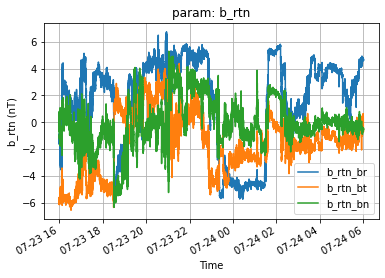

In [2]:
parameter_obj = amda.get("solo_b_rtn_hr", "2020-07-23T16:00:00", "2020-07-24T06:00:00")
print(parameter_obj)
parameter_obj.plot()

If the `id` does not correspond to any object in AMDA (dataset of parameter) then a `None` is returned.

In [3]:
print(amda.get("abc", "2000-01-01T00:00:00", "2000-02-01T00:00:00"))

None


The `parameter_obj` returned by `AMDA.get` allows you to access the data as a `pandas.core.frame.DataFrame` object through its `data` attribute.

In [4]:
print(type(parameter_obj.data))
parameter_obj.data.describe()

<class 'pandas.core.frame.DataFrame'>


,b_rtn_br,b_rtn_bt,b_rtn_bn
count,403206.000000,403206.000000,403206.000000
mean,1.587354,-1.511776,-0.038760
std,3.381337,2.306069,1.770018
min,-5.752000,-6.531000,-6.343000
25%,-0.028000,-2.891000,-0.894000
50%,2.854000,-1.485000,-0.215000
75%,4.189750,0.139000,0.817000
max,6.737000,4.379000,5.294000


`Parameter` data is indexed by time and implements the bracket operator so that the following are equivalent.

In [5]:
parameter_obj.data[:3]
parameter_obj[:3]

,b_rtn_br,b_rtn_bt,b_rtn_bn
Time,,,
2020-07-23 16:00:00.084,-0.931,-5.683,-0.183
2020-07-23 16:00:00.207,-0.956,-5.637,-0.196
2020-07-23 16:00:00.334,-0.956,-5.609,-0.336


Datasets
--------

As with parameters, datasets in AMDA have a unique :data:`id` that you will need in order to access the datasets contents and description.

Parameter and dataset descriptions can be retrieved by using the `AMDA.collection.find` method. It return a description of the target, by **does not contain data**.

In [6]:
parameter_description = amda.collection.find("solo_b_rtn_hr")
print(parameter_description)
print("Dataset id : {}".format(parameter_description.dataset_id))

Parameter item (id:solo_b_rtn_hr, name:b_rtn, units:nT, disp:timeseries, dataset:so-mag-rtnhr, n:3)
Dataset id : so-mag-rtnhr


In this example the parameter was taken from the **so-mag-rtnhr** dataset. Passing the description to the `AMDA.get` method will download the corresponding item (dataset or parameter)

In [7]:
dataset_description = amda.collection.find("so-mag-rtnhr")
print(dataset_description)
dataset= amda.get(dataset_description)
print(dataset)

Dataset item (id:so-mag-rtnhr, name:0.1 sec : rtn, global_start:2020-04-15 00:00:00, global_stop:2020-12-31 23:59:59, n_param:3)
	Parameter item (id:solo_b_rtn_hr, name:b_rtn, units:nT, disp:timeseries, dataset:so-mag-rtnhr, n:3)
	Parameter item (id:solo_b_rtn_hr_tot, name:|b|, units:nT, disp:timeseries, dataset:so-mag-rtnhr, n:1)
	Parameter item (id:solo_b_rtn_hr_qf, name:quality, units:None, disp:timeseries, dataset:so-mag-rtnhr, n:1)
Dataset (id:so-mag-rtnhr, start:2020-04-15 00:00:00.233000, stop:2020-04-15 23:59:59.937000, n_param:3)
	Parameter (id:solo_b_rtn_hr, name:b_rtn, units:nT, shape: (691175, 3))
	Parameter (id:solo_b_rtn_hr_tot, name:|b|, units:nT, shape: (691175,))
	Parameter (id:solo_b_rtn_hr_qf, name:quality, units:None, shape: (691175,))


Datasets are simply a collection of *timeseries*. The `parameters` attribute allows you to iterate over the datasets parameters. For example print the parameter names and units :

In [8]:
for param in dataset.parameters:
    print(param.name, param.units)

b_rtn nT
|b| nT
quality None


Note that the full dataset can be viewed through the `data` attribute. The dataframe is a concatenation of all parameters in the dataset. In the case of parameters with multiple components, each individual component is stored as a column in the resulting dataframe.

In [9]:
dataset.data.describe()

,b_rtn_br,b_rtn_bt,b_rtn_bn,|b|,quality
count,691039.000000,691039.000000,691039.000000,691036.000000,691175.000000
mean,-2.703336,2.789612,-0.575033,4.936804,2.759170
std,1.704028,1.899304,1.650740,0.533450,0.427588
min,-6.259000,-4.879000,-6.117000,1.330000,2.000000
25%,-3.904000,2.191000,-1.633000,4.605000,3.000000
50%,-3.142000,3.277000,-0.600000,4.944000,3.000000
75%,-1.732000,4.046000,0.341000,5.261000,3.000000
max,3.671000,6.130000,5.437000,6.628000,3.000000


Access individual parameters by name using the bracket operator `dataset[<param_name>]` : 
  * if `param_name` corresponds to a parameter name then return a `Parameter` object
  * if `param_name` corresponds to one of the columns then return the column as a `pandas.core.frame.DataFrame` object

In [10]:
for param in dataset.parameters:
    print(type(dataset[param.name]))
for cn in dataset.data.columns:
    print("{} -> type:{}".format(cn,type(dataset[cn])))

<class 'amdapy.amda.Parameter'>
<class 'amdapy.amda.Parameter'>
<class 'amdapy.amda.Parameter'>
b_rtn_br -> type:<class 'pandas.core.series.Series'>
b_rtn_bt -> type:<class 'pandas.core.series.Series'>
b_rtn_bn -> type:<class 'pandas.core.series.Series'>
|b| -> type:<class 'amdapy.amda.Parameter'>
quality -> type:<class 'amdapy.amda.Parameter'>


Plotting
--------

Just for convenience plot a parameter with the `Parameter.plot` method :

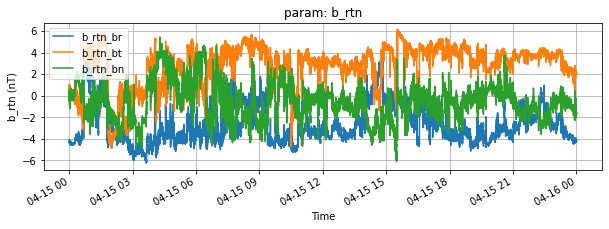

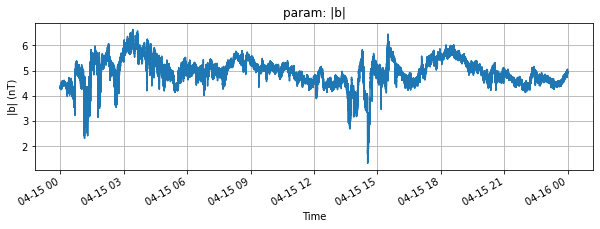

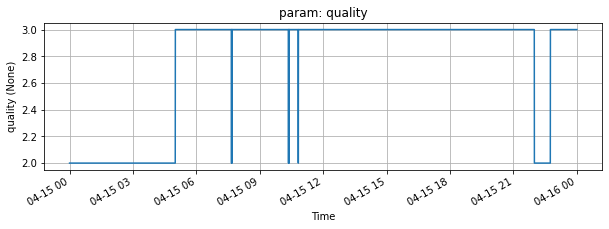

In [11]:
for param in dataset.parameters:
    param.plot(figsize=(10,3))